DATASET: Iris
Logistic Regression: Validation Accuracy = 0.943, Test Accuracy = 1.000
Decision Tree: Validation Accuracy = 0.933, Test Accuracy = 1.000
Random Forest: Validation Accuracy = 0.943, Test Accuracy = 1.000
Gradient Boosting: Validation Accuracy = 0.905, Test Accuracy = 1.000
Support Vector Machine: Validation Accuracy = 0.943, Test Accuracy = 1.000
K-Nearest Neighbors: Validation Accuracy = 0.914, Test Accuracy = 1.000

Best Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



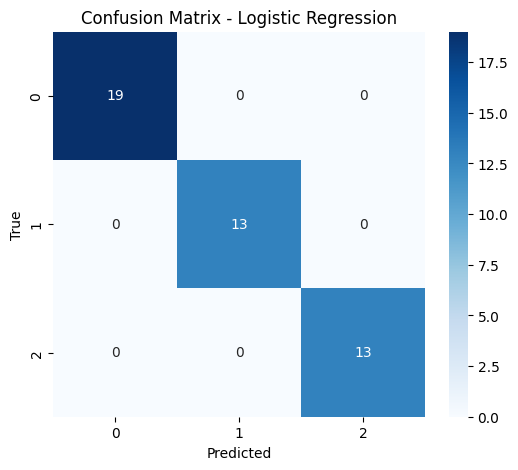

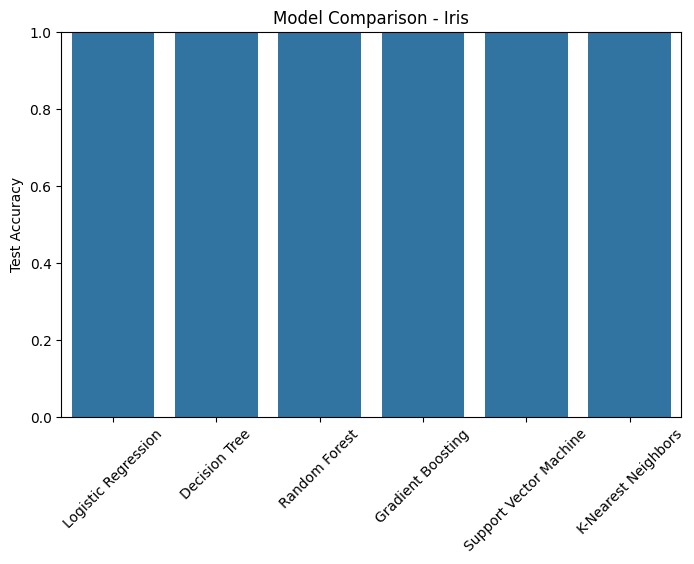




DATASET: Breast Cancer
Logistic Regression: Validation Accuracy = 0.975, Test Accuracy = 0.982
Decision Tree: Validation Accuracy = 0.905, Test Accuracy = 0.942
Random Forest: Validation Accuracy = 0.955, Test Accuracy = 0.965
Gradient Boosting: Validation Accuracy = 0.955, Test Accuracy = 0.959
Support Vector Machine: Validation Accuracy = 0.967, Test Accuracy = 0.977
K-Nearest Neighbors: Validation Accuracy = 0.955, Test Accuracy = 0.959

Best Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



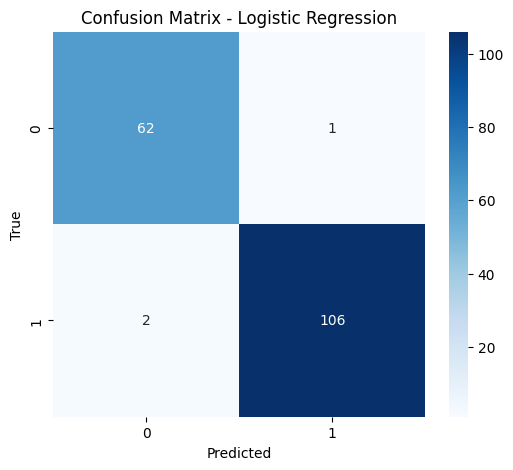

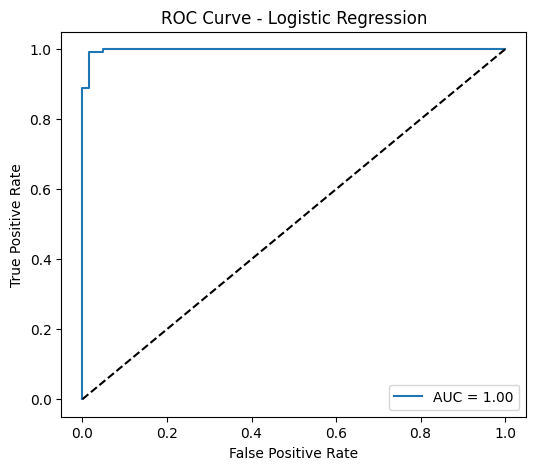

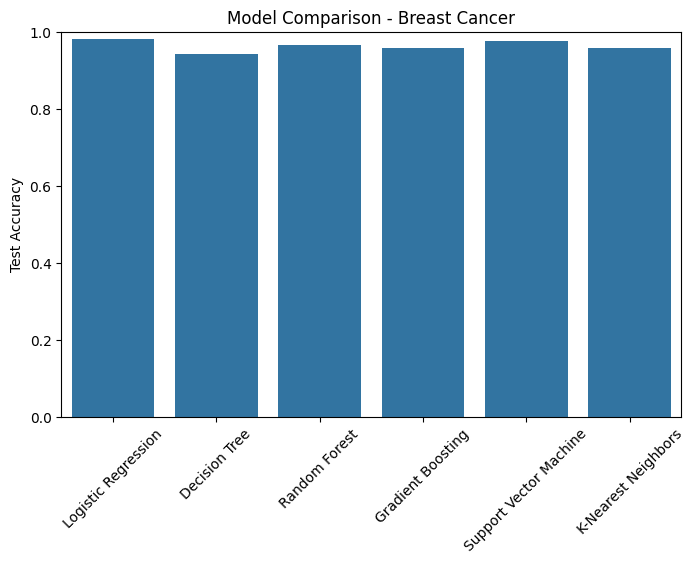




DATASET: Wine
Logistic Regression: Validation Accuracy = 0.984, Test Accuracy = 0.981
Decision Tree: Validation Accuracy = 0.943, Test Accuracy = 0.963
Random Forest: Validation Accuracy = 0.968, Test Accuracy = 1.000
Gradient Boosting: Validation Accuracy = 0.895, Test Accuracy = 0.907
Support Vector Machine: Validation Accuracy = 0.968, Test Accuracy = 0.981
K-Nearest Neighbors: Validation Accuracy = 0.952, Test Accuracy = 0.963

Best Model: Random Forest
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



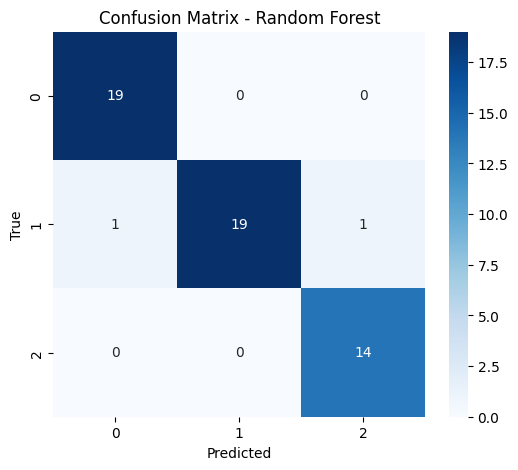

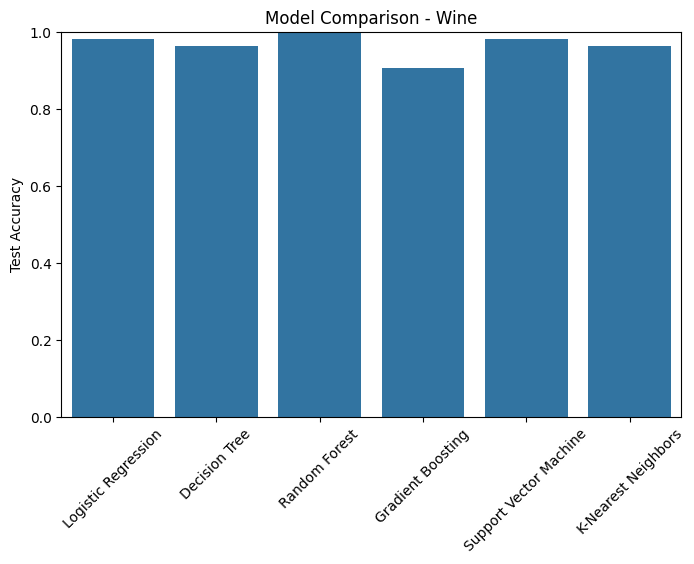




DATASET: Digits
Logistic Regression: Validation Accuracy = 0.951, Test Accuracy = 0.970
Decision Tree: Validation Accuracy = 0.827, Test Accuracy = 0.852
Random Forest: Validation Accuracy = 0.966, Test Accuracy = 0.978
Gradient Boosting: Validation Accuracy = 0.948, Test Accuracy = 0.969
Support Vector Machine: Validation Accuracy = 0.975, Test Accuracy = 0.980
K-Nearest Neighbors: Validation Accuracy = 0.969, Test Accuracy = 0.976

Best Model: Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.94      1.00      0.97        47
           3       0.98      0.94      0.96        54
           4       0.98      1.00      0.99        60
           5       0.97      1.00      0.99        66
           6       0.98      1.00      0.99        53
           7       1.00      0.96      0.98        55
           8       0.95      0.95    

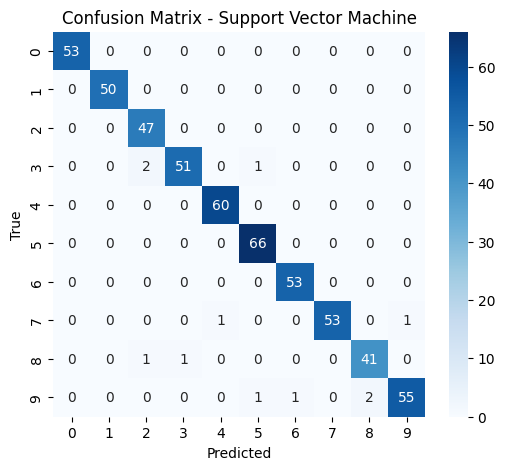

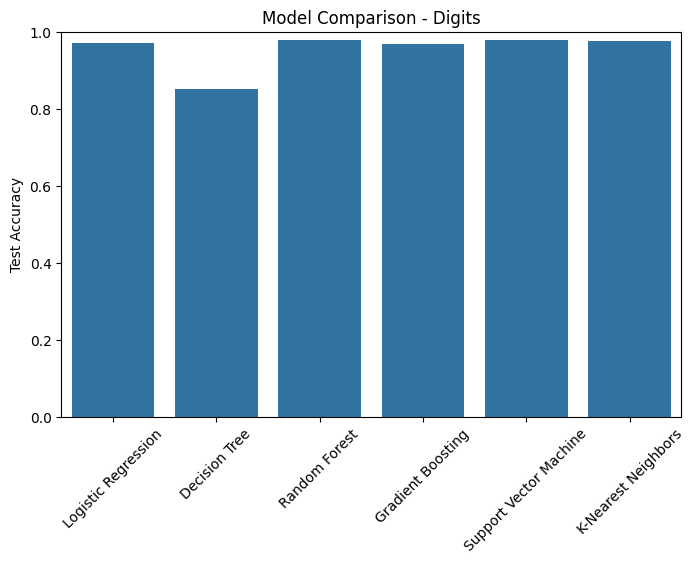

In [1]:
# AutoML System in Pure Python (Sklearn, NumPy, Matplotlib, Seaborn)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

# Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Define datasets to use
dataset_loaders = {
    "Iris": datasets.load_iris,
    "Breast Cancer": datasets.load_breast_cancer,
    "Wine": datasets.load_wine,
    "Digits": datasets.load_digits
}

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Utility function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Utility function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test, title):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_prob = model.decision_function(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend()
    plt.show()

# Main AutoML Function
def automl_system():
    for dataset_name, loader in dataset_loaders.items():
        print("="*70)
        print(f"DATASET: {dataset_name}")
        print("="*70)
        
        data = loader()
        X = data.data
        y = data.target
        
        # For binary classification only for ROC
        is_binary = len(np.unique(y)) == 2
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Standardize features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        results = {}
        
        for model_name, model in models.items():
            pipeline = Pipeline([
                ('model', model)
            ])
            
            scores = cross_val_score(pipeline, X_train, y_train, cv=5)
            avg_score = scores.mean()
            
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            
            results[model_name] = acc
            
            print(f"{model_name}: Validation Accuracy = {avg_score:.3f}, Test Accuracy = {acc:.3f}")
        
        # Find the best model
        best_model_name = max(results, key=results.get)
        best_model = models[best_model_name]
        best_model.fit(X_train, y_train)
        y_pred_best = best_model.predict(X_test)
        
        print("\nBest Model:", best_model_name)
        print(classification_report(y_test, y_pred_best))
        
        # Plot confusion matrix
        plot_confusion_matrix(y_test, y_pred_best, best_model_name)
        
        # Plot ROC Curve if binary
        if is_binary:
            plot_roc_curve(best_model, X_test, y_test, best_model_name)
        
        # Bar Plot of all model performances
        plt.figure(figsize=(8,5))
        sns.barplot(x=list(results.keys()), y=list(results.values()))
        plt.title(f'Model Comparison - {dataset_name}')
        plt.ylabel('Test Accuracy')
        plt.xticks(rotation=45)
        plt.ylim(0,1)
        plt.show()
        print("\n\n")

# Run the AutoML System
if __name__ == "__main__":
    automl_system()
